# Unsupervised Learning

#### 1. Technique of learning the patterns without any labels of assistance. 
#### 2. Model learns on its own by finding patterns in the data
#### 3. Cannot directly asses the performace of unsupervised learning models, need to use business sense

# Cluster Analysis

### Clustering

Classify each data point into a specific group
Data points that are  in the same group should exhibit similar features while data points in different groups should exhibit dissimilar properties

### Types of Clustering


#### Hard Clustering

* Each data point either belongs to a cluster completely or not.
* This means that every data point will belong to one and only one cluster at a time

#### Soft Clustering

* Each data point either belongs to multiple clusters at a given time.
* This means data points can be associated to multiple clusters at a given time 

##### In most scenarios, we prefer hard clustering as we want each data point to be present in only one of the clusters

### Types of Clustering ; Other classifications

#### Connectivity Based CLustering

* These models work on the basis of ditance, if two data points are closer to each other they are similar to each other
* The data points lying closer to each other will be grouped in one cluster and data points lying far from each other will be seperated

    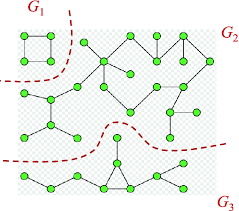

#### Centroid Based CLustering

* These models work on the notion that similarity is derived by the closeness of a data point to the centroid of clusters
* Most common example is K-Means model

    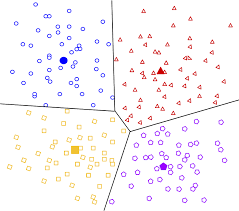

#### Density Based Modelling

* These models cluster data points by finding areas of varies density and assigning data ppoints to these different density regions
* A famous example of this kind of clustering is DBSCAN
    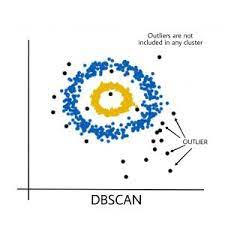

### Applications of clustering

#### Sales and Marketing

* Optimization of Marketing Ad campaigns for Best Returns
* Tracking down taget customers for better revenue generation
* Grouping cutomers with similar characteristics

#### Fraud analytics

* Can help identify fraudulent patterns and then clustering all similar data points

#### Other applications
* Fakenews detection
* Spam mails filtering
* Finding distinct groupd for EMail marketing and follow up
* Finding distinct groupd for providing offers and benefits to customers

# K-Means Clustering

* K in K-means clustering, refers to the number of clusters
* It is Centroid Based algorithm
* Tries to make intra-cluster dtaa points as similar as possible while aslo keeping the cluster clsuters as different as possible

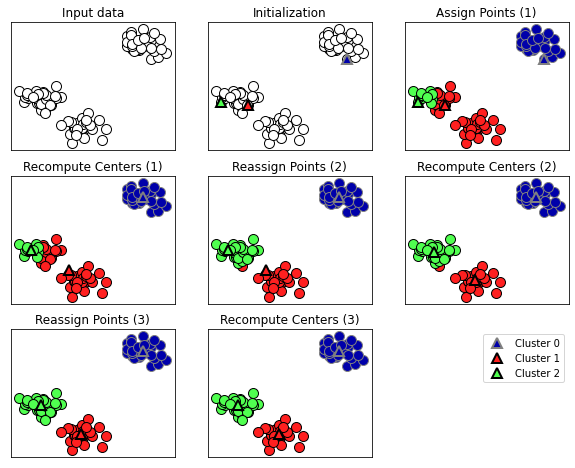

In [1]:
## Helps visualize the working of any machine learning algorithm
import mglearn

mglearn.plots.plot_kmeans_algorithm()

In the above example we can see the following steps :

* Data can be seen to have 3 distinct clusters
* Initialize 3 daat centres at random
* Calculate the distance of all the white points from Red, Blue, and the Green centroids
* The points in data are now assigned to centres based on cluster centres
* Recompute centres
* Reassign points

## Finding Optimal Value of K

### Elbow Method

* The elbow method is used in determing the optimum number of clusters in a data set
* We plot explained variation against the number of clusters, and finally pick the elbow of the curve as the number of clusters to use
* In case there are multiple elbow, pick the last elbow

    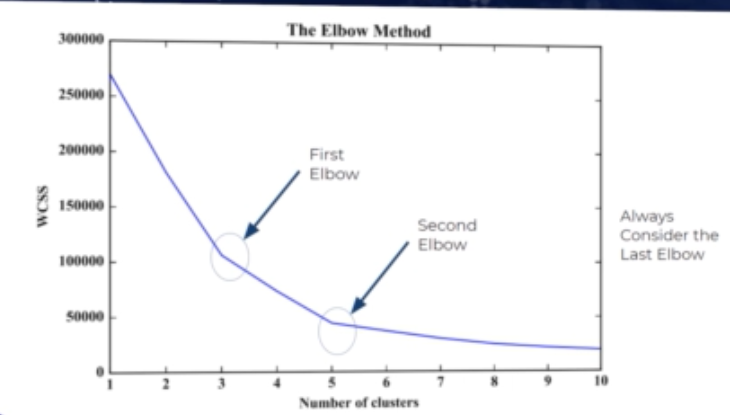

# Example : Mall Customers

### Problem Statement : Find the distinct group of customers resent in the mall data? Which charactersitics of the customer should be chosen for making clusters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.shape


(200, 5)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


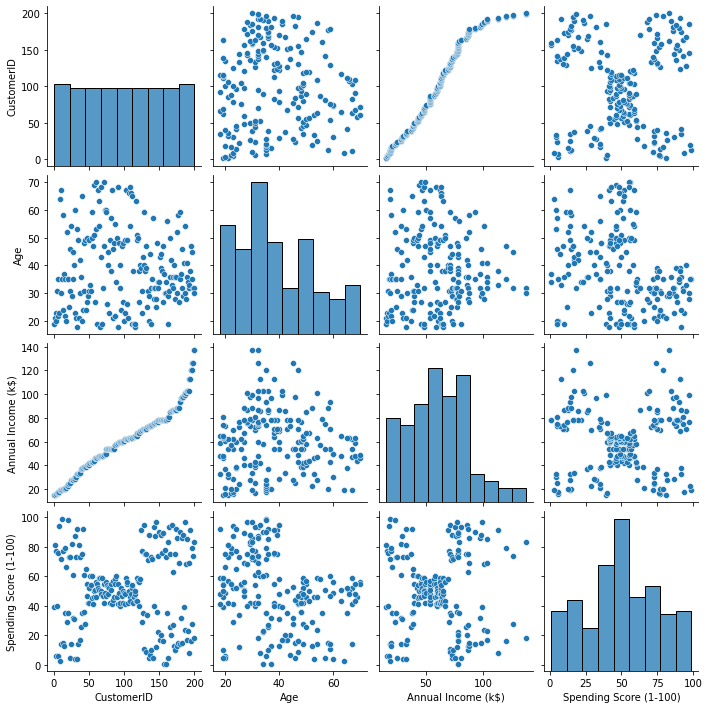

In [5]:
sns.pairplot(data)

##### As we can see there are distinct clusters available in case of Annual income and Spending score, let's proceed with the analysis on these two columns

In [6]:
x = data[['Annual Income (k$)','Spending Score (1-100)']].values

In [7]:
print(x.shape)

(200, 2)


### We are going to use the Elbow method to determine the number of clusters that is optimal for the data

Calculate the <b>within cluster sum of squared errors</b> for different values of k and choose the k for which WSS becomes first starts to dimnish, In the plot if WSS-versus-k, this is visible as an elbow

Within-Cluster-Sum of Squared Errors Algorithm:
* Squared error for each poin is the square of the distance of the point from its representation, i.e. its predicted clusters

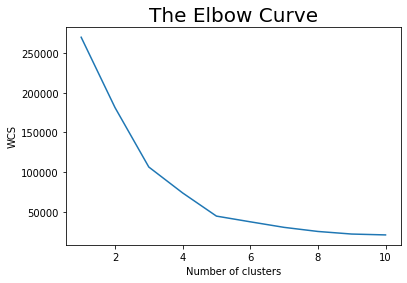

In [8]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.show()

##### Last elbow is occuring at 5, therefore the optimal number of clusters is 5

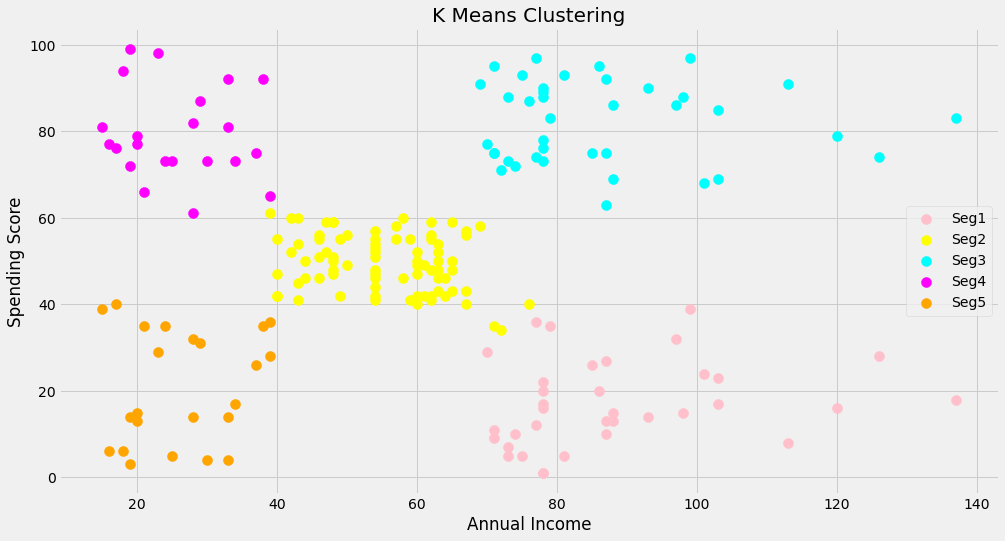

In [9]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
y_means = km.fit_predict(x)

plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

plt.scatter(x[y_means == 0,0],x[y_means == 0,1], s = 100, c = 'pink', label = 'Seg1')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1], s = 100, c = 'yellow', label = 'Seg2')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1], s = 100, c = 'cyan', label = 'Seg3')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1], s = 100, c = 'magenta', label = 'Seg4')
plt.scatter(x[y_means == 4,0],x[y_means == 4,1], s = 100, c = 'orange', label = 'Seg5')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [10]:
y_means.shape

(200,)

# Silhouette Score

* Silhouette score values lie in the range of -1 and 1. The value of +1 is ideal and -1 is least preferred
* Value of +1 indicates that the sample is far wasy from its neighbouring clsuter and very close to the cluster it is assigned
* Value of -1 indicated that the point is close to its neighbouring cluster than to cluster its assigned
* Value of 0 means it's at the boundary of the distance between two clusters

## Using Silhouette Score to analyze clusters

* It measures the quality of a clustering i.e., determines how wel each object lies within its cluster.
* The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k

## Silhouette Method for considering the optimal number of clusters


In [11]:
from sklearn.metrics import silhouette_score

#Calculate score
score = silhouette_score(x, km.labels_, metric = 'euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.554


##### Silhouette method uses the euclidean method for calculating the distance between two data points 

##### Use the yellowbrick library to understand 'black-box' models

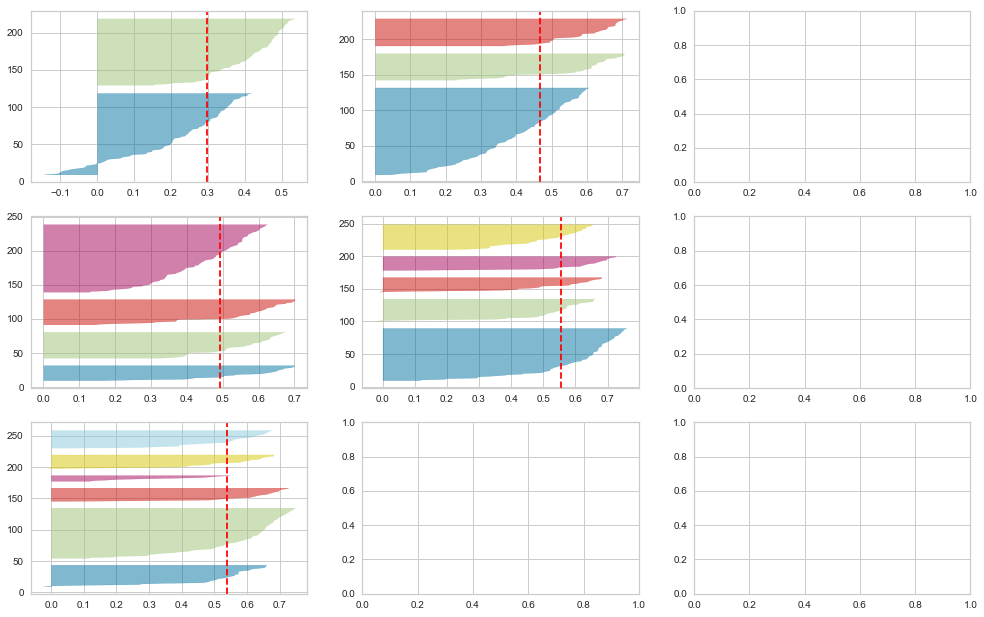

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3,3, figsize = (15,10))
for i in [2,3,4,5,6]:
    #Create KMeans instance for differnect number of clusters
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init=10, random_state = 42)
    q, mod = divmod(i,2)
#     plt.title(i,' Number of Clusters')
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)


## Clustering Mutiple Dimensions

##### We can perform clustering analysis on any number of features, but we can visualize the clusters only for 2 and 3 clusters

In [13]:
## Let's check the head of dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
## Removing columns that we might not be able to use

## Removing the customer ID, Gender

a = data.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values

## Check the new dataset
a.shape

(200, 3)

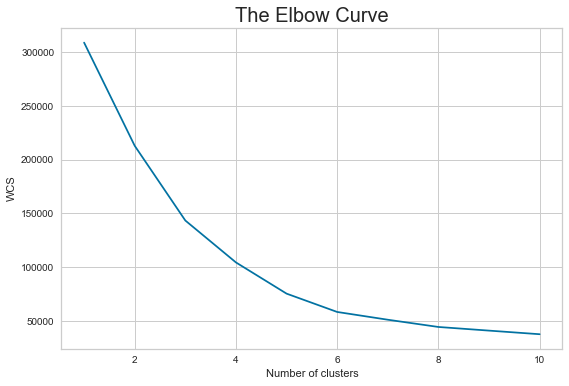

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(a)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCS')
plt.show()

In [16]:
## Performing k-means clsutering analysis

km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(a)

In [17]:
y_means = pd.DataFrame(y_means)
df = pd.concat([data, y_means], axis = 1)
df = df.rename(columns = {0:"Clusters"})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

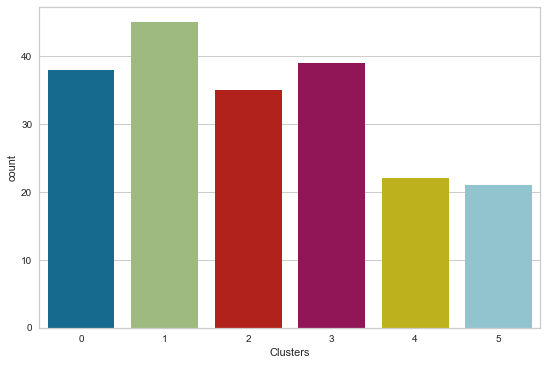

In [18]:
sns.countplot(df['Clusters'])

## Hierrarchical Clustering

- An algortihm that groups similar objects into groups called clusters
- An endpoint is a set of clusters, where each cluster is distinct from each other cluster
- There are two types of clustering
    - Divisive Method 
        - Top - Down clustering Method
        - Assign all observations to a single cluster and then partition the cluster to two least similar clsuters
        - Proceed recursively on each cluter until there is one cluster for each observation
        - Produce more accurate hierarchies than agglomerative algortihmes in some circumstances but are coneptually more complex


    - Agglomerative Method  
        - Bottom - Up clustering Method
        - Assign each observation to its own cluster
        - Compute the similarity between each cluster and join the two most similar clusters



   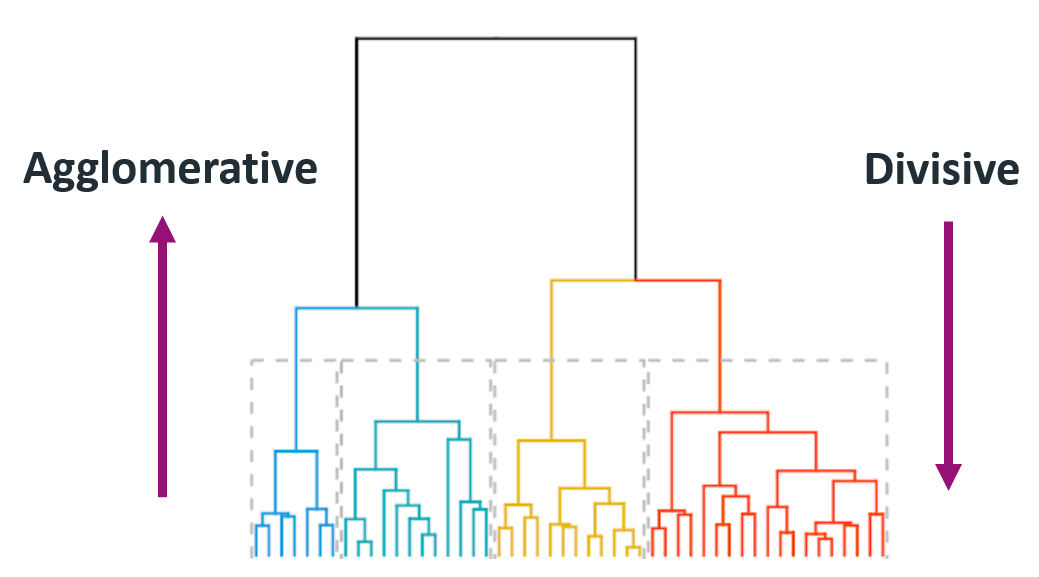

## Hierrarchical Clustering : Methods for Computing Distance

- There are three different methods which differ in how the distance between each cluster is measured
    - Single Linkage
    - Complete Linkage
    - Average Linkage
    
    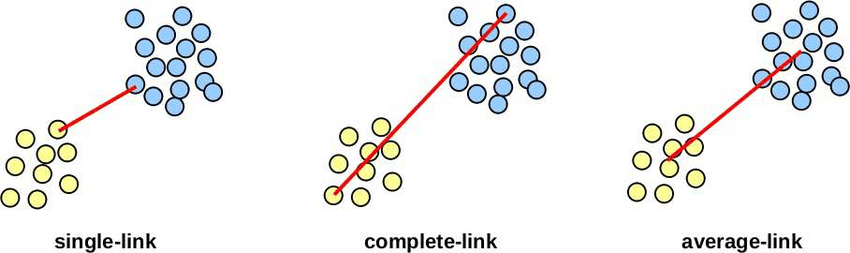

#### Single Linkage

- Distance between two clusters is defined as the shortest distance between two points in each cluster
- For example distance between clusters is equal to the length of arrow between their closest paths

#### Complete Linkage

- Distance between two clusters is defined as the longest distance between two points in each cluster

#### Average Linkage

- Distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster


## Hierarchical Clustering : Identifying optimal Number of Clusters

### Dendrograms

- A dendrogram is a diagram that shows the hierarchical relatioships between objects
- It is most commonly created as an output from hierarchical clustering
- The main use of a dendogram is to work out the best way to allocate objects to clusters

##### There are several other methods for checking the ideal number of clusters
- Gap Statistic
- Elbow Method
- Silhouette Coefficient
- Calinski-Harabasz Index
- Davies-Bouldin Index
- Dendrogram
- Bayesian information criterion (BIC)

##### Reference
https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad


In [19]:
x = data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

## Check the new dataset
x.shape

(200, 2)

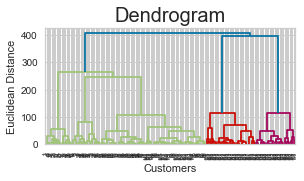

In [20]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (4,2)

dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


##### There are multiple optioins for number of clusters, 
##### Option 1, Horizontal Line at 350, this would give us 3 clusters
##### Option 2, Horizontal line at 200, this would give us 5 clusters
##### The best option would be to cut at point where it cuts longest lines, i.e. at 200

## Hierarchical Clustering : Implementation

In [21]:
## Implementing the hierarchical Clustering (Agglomerative CLustering)

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(x)

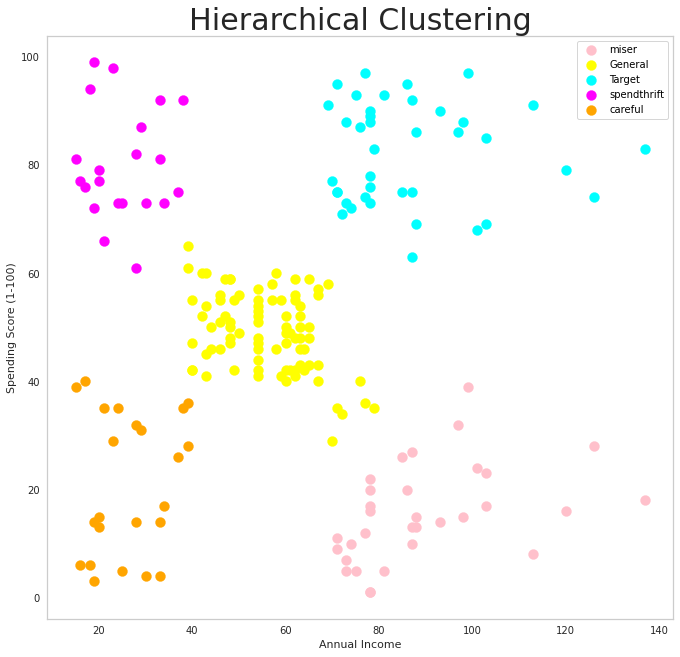

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)


## Visualizing Clusters

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser' )
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')


plt.style.use('default')
plt.title('Hierarchical Clustering', fontsize = 30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

##### When data is spherical in shape, K-Means is preferred. Whereas, Hierarchical clustering is preferred in other scenarios and is suitable for social networking analysis
##### In large datasets, where determing the number of clusters might be difficult, we can use DBSCAN clustering algortihm
##### DBSCAN finds the optimal number of clusters on its own



## DBSCAN Clustering

###### DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points

###### It also marks the outliers which lie in low-density regions

- The DBSCAN algorithm basically requires 2 parameters which are :
    - Epsilon : 
        - Specify how close points should be to each other to be considered a part of a cluster
        - Distance between two points is less than or equal to EPs value, it will be considered as neighbors
        - Acts as a threshold for considering 2 points as neighbors
        
    - MinPoints : 
        - Minimum number of points to form a dense region
        - Thumbrule, MinPoints is equal to twice the number of columns in dataset 
        - If columns <=2 , then default value of 4)
        
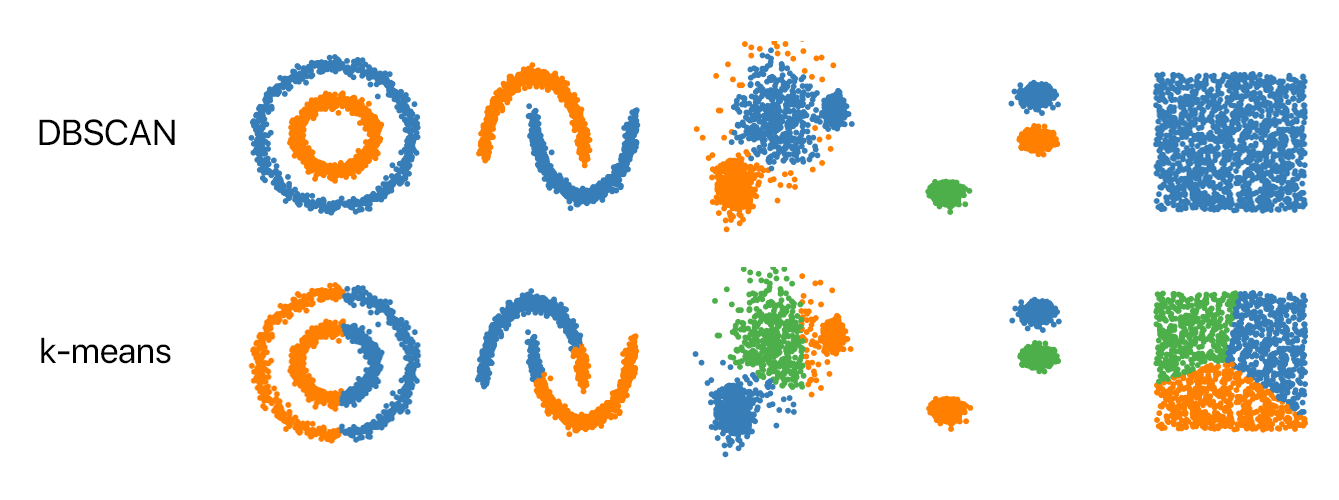

## DBSCAN Clustering : Types of points in DBSCAN Clustering

DBSCAN (Density Based Spatial Clustering of Applications with Noise) is a popular learning method utilized in model building and machine learning algorithms. This is a clustering method that is used in machine learning to seperate clusters of high density from clusters of low density

##### There are three types of points after DBSCAN clustering is complete:
   - Core 
       - It is pooint that has at least m points within distance from itself
   - Border 
       - This is a point that has atleast one core point at a distance n
   - Noise 
       - which is a point that is neither a Core not a Border. And it has less than m points within distance n from itself    

In [23]:
x = data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

## Check the new dataset
x.shape

(200, 2)

In [24]:
## Determing MinPoints value, as the number of dimensions are 2 we will go with default value of 4

## For epsilon, we will check the distance from each point to ist closest neighbor using nearest neighbors 

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(x)
dist, indices = nbrs.kneighbors(x)


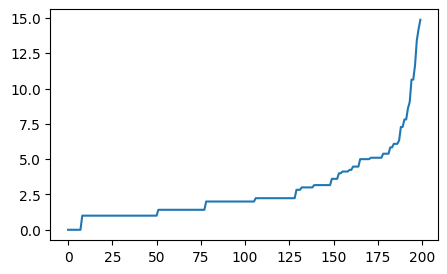

In [25]:
## Sort and plot the results

dist = np.sort(dist, axis =0)
dist = dist[:,1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(dist)
plt.show()

##### Look for the value at which the curve has the maximum curvature, i.e. the value 8. Therefore, the MinPoints value is 8

In [26]:
from sklearn.cluster import DBSCAN

##Clsuter the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4)
clusters = dbscan.fit_predict(x)


No handles with labels found to put in legend.


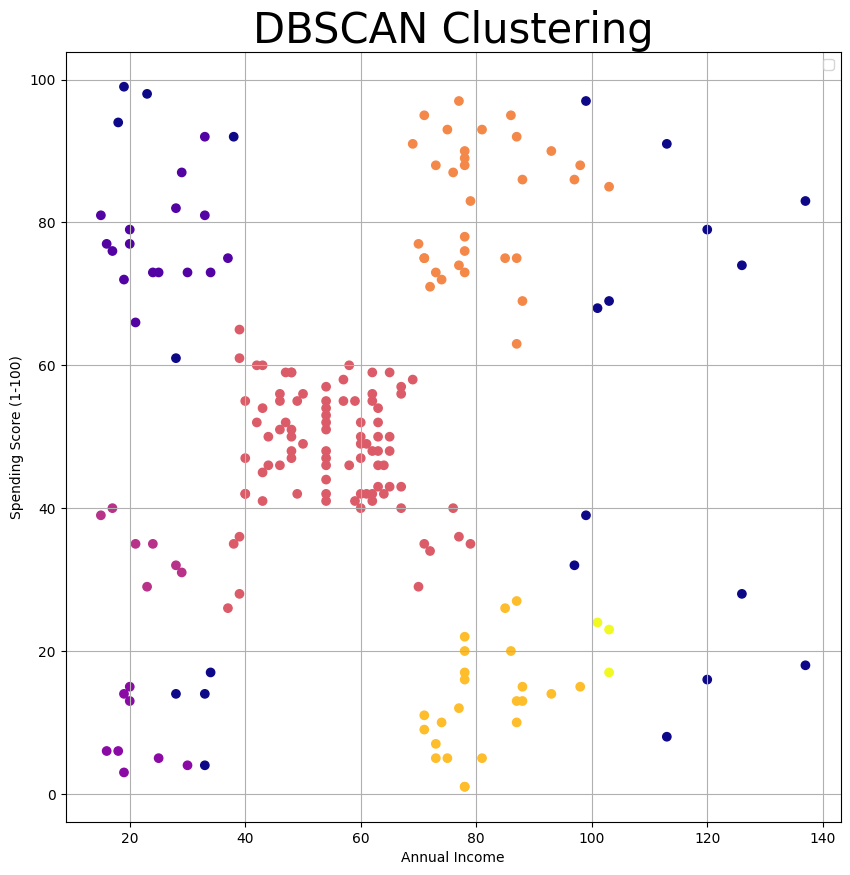

In [27]:
plt.rcParams['figure.figsize'] = (10, 10)


## Visualizing Clusters

plt.scatter(x[:,0], x[:, 1], c = clusters, cmap = 'plasma' )
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')


plt.style.use('default')
plt.title('DBSCAN Clustering', fontsize = 30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

##### The algorithm has found out the clusters as well as flagged out the outliers highlighted in dark-blue colour

## Dimensionality Reduction

##### Dimesnsional Reduction is a technique which helps us to elimincate all the irrlevant and useless columns from the dataset without leading to any type of information loss

- High dimensional datasets possess high risk of over-fitting
- Therefore, dimensionality reduction is important
- Dimensionality reduction helps us to reduce useless columns from the dataset and avoids overfitting
- Examples of column where dimensionality reduction needed;
    - Birth year and Age, if both these columns are present in the dataset, they both convey the same information

##### Dimensionality reduction is opposite of feature engineering, feature engineering means creating new featuers and adding columns, whereas DR focuses on removing columns whic provide repated information

## Dimensionality Reduction : Techniques

#### Correlation Filtering

- Correlation of all the columns with respect to all the columns and then find the pair of highly correlated columns

- Remove highly correlated columns from the dataset to reduce dimension of dataset

#### Variance Inflation Filtering

- Calculate the variance for the independent variables

- Remove/eliminate all those columns from dataset where variance comes out to be less than or equal to 5

#### Feature Selection

- BorutaPy

- Recursive Feature Elimination with Cross Validation (RFECV)

#### Advaned Techniques for dimensionality reduction

- Principal Component Analysis

- t-SNE

- Linear Discriminant Analysis

### Case Study : Employee Attrition

In [28]:
data = pd.read_csv('employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
data.shape

(1470, 35)

### Description

- Attrition [Target Variable] : has two types of values 0 and 1, where 0 means that the employee will not leave the organization and 1 means employee will leave

### Problem Statement

##### Predict which emplyees are going to leave organization in near future

In [30]:
data.nunique().sort_values(ascending = False)

EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime                       2
Attrition 

In [31]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
## Let's drop columns EmployeeCount and EmployeeNumber, Over18 and StandardHours from the database, as these provide very little information for the analysis

data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1)

### Check for missing Values

In [33]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Check datatypes

In [34]:
data.dtypes.sort_values()

Age                          int64
YearsInCurrentRole           int64
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
TotalWorkingYears            int64
StockOptionLevel             int64
RelationshipSatisfaction     int64
PerformanceRating            int64
PercentSalaryHike            int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
EnvironmentSatisfaction      int64
Education                    int64
DistanceFromHome             int64
DailyRate                    int64
JobSatisfaction              int64
JobRole                     object
OverTime                    object
Gender                      object
EducationField              object
Department                  object
BusinessTravel      

### Label Encoding

In [35]:
# Let's encode these object data types as numerical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['JobRole'] = le.fit_transform(data['JobRole'])
data['OverTime'] = le.fit_transform(data['OverTime'])
data['Gender'] = le.fit_transform(data['Gender'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Department'] = le.fit_transform(data['Department'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Attrition'] = le.fit_transform(data['Attrition'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])

##Let's check the dtypes once again
data.dtypes.sort_values()

MaritalStatus               int32
Attrition                   int32
BusinessTravel              int32
Department                  int32
JobRole                     int32
EducationField              int32
OverTime                    int32
Gender                      int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
TrainingTimesLastYear       int64
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
StockOptionLevel            int64
NumCompaniesWorked          int64
Age                         int64
MonthlyIncome               int64
YearsSinceLastPromotion     int64
JobSatisfaction             int64
JobLevel                    int64
JobInvolvement              int64
HourlyRate                  int64
EnvironmentSatisfaction     int64
Education                   int64
DistanceFromHome            int64
DailyRate                   int64
MonthlyRate   

### Target-Feature Variable Split

In [36]:
## Let's plit the target column attrition from the dataset

y = data['Attrition']
x = data.drop(['Attrition'], axis = 1)

## Check shape of target and feature variables

print(x.shape)
print(y.shape)

(1470, 30)
(1470,)


In [37]:
## Check the distribution of target variables

data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

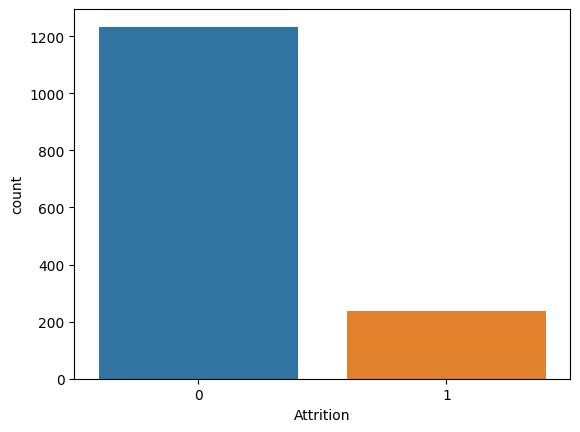

In [38]:
sns.countplot(data['Attrition'])

### Treating Class Imbalance

C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

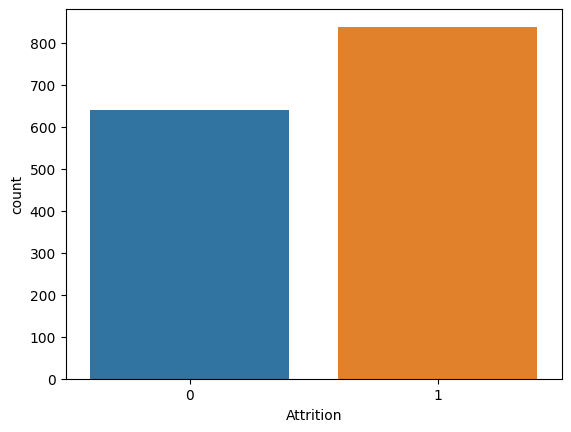

In [39]:
from imblearn.combine import SMOTEENN

##Defining the model
sn = SMOTEENN(random_state = 0)

## Training model
sn.fit(x,y)

## Making samples
x, y = sn.fit_resample(x,y)

## Class distribution
sns.countplot(y)

### Train - Test Split

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1182, 30)
(296, 30)
(1182,)
(296,)


### Modelling

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       124
           1       0.91      0.83      0.87       172

    accuracy                           0.85       296
   macro avg       0.85      0.86      0.85       296
weighted avg       0.86      0.85      0.85       296



### Dimensionality Reduction : Correlation Filtering and Heatmap

- Correlation is statistical relatioship between two variables. In the broadest sense, it refers to the degree to which a pair of variables are linearly related

- Going to visualize the vairbles using a heatmap, which is a data viz technique that shows the magnitude of a phenomenon as color in two dimensions. The variation in color may be cateory or intensity

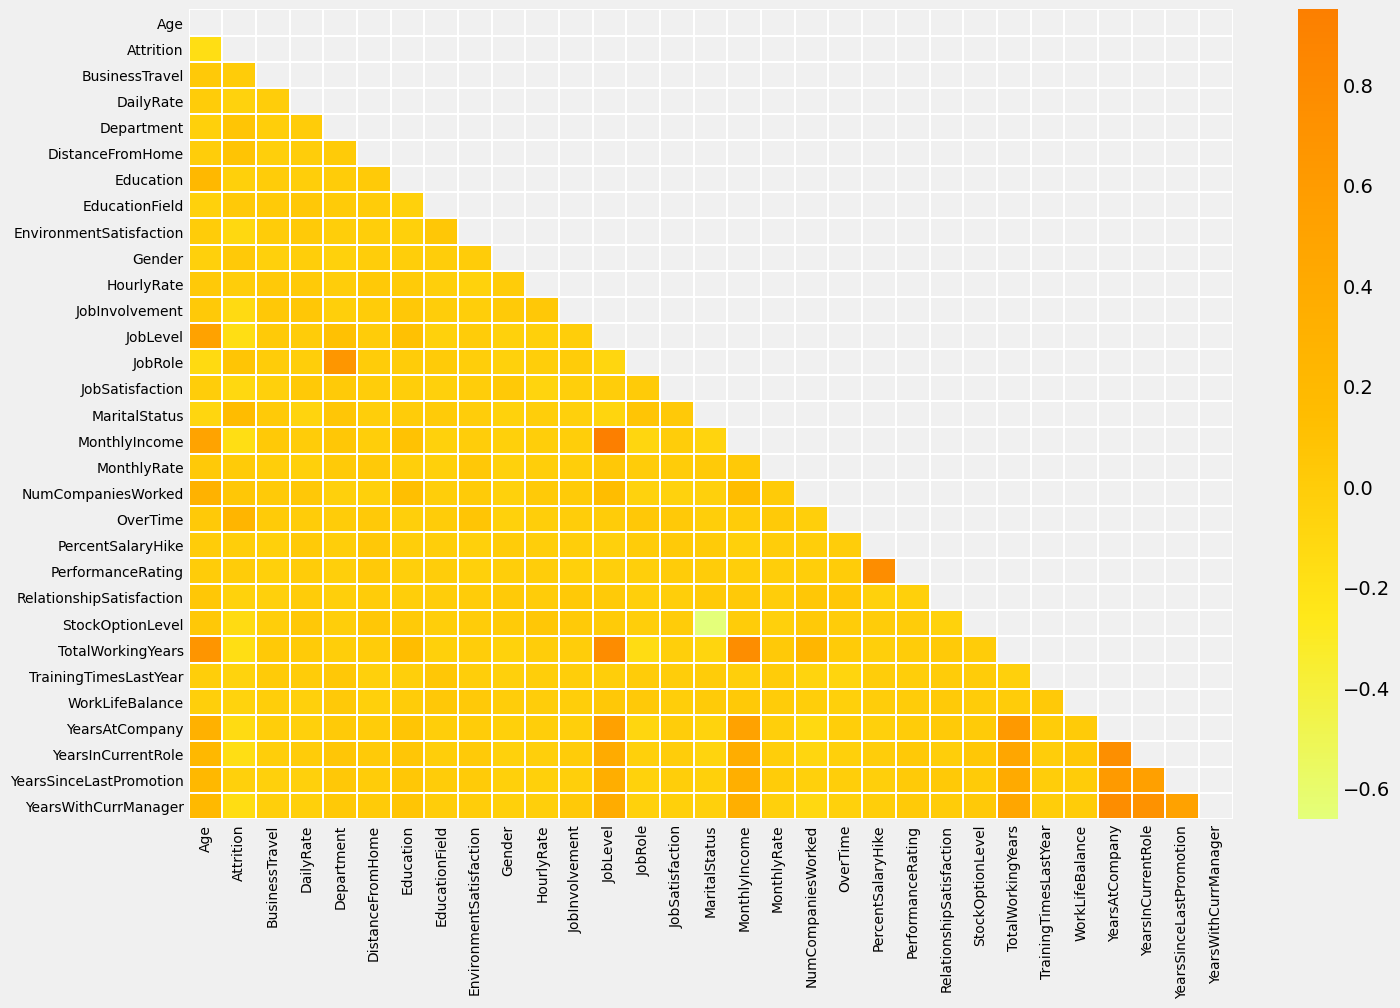

In [42]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) ##mask is create to make sure we see only the lower triangle of the heatmap
sns.heatmap(corr, mask = mask, cmap = 'Wistia', linewidths = 0.2) ## Wistia, is yellow color- pallete
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

- Age : TotalWorkingYears, MonthlyIncome and JobLevel --> Remove JobLevel
- Department : JobRole --> Remove JobRole
- JobLevel : TotalWorkingYears and MonthlyIncome --> Remove Total working Years
- PerformacneRating : PercentSalaryHike --> Remove PercentSalaryHike
- YearsatCurrentRole : YearsinCompany

In [43]:
data_cf = data.drop(['JobRole','JobLevel','PercentSalaryHike','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'], axis = 1)

## Check Shape
data_cf.shape

(1470, 25)

In [44]:
le = LabelEncoder()

data_cf['OverTime'] = le.fit_transform(data_cf['OverTime'])
data_cf['Gender'] = le.fit_transform(data_cf['Gender'])
data_cf['EducationField'] = le.fit_transform(data_cf['EducationField'])
data_cf['Department'] = le.fit_transform(data_cf['Department'])
data_cf['BusinessTravel'] = le.fit_transform(data_cf['BusinessTravel'])
data_cf['Attrition'] = le.fit_transform(data_cf['Attrition'])
data_cf['MaritalStatus'] = le.fit_transform(data_cf['MaritalStatus'])

##Let's check the dtypes once again
data_cf.dtypes.sort_values()

Age                         int64
WorkLifeBalance             int64
TrainingTimesLastYear       int64
StockOptionLevel            int64
RelationshipSatisfaction    int64
PerformanceRating           int64
OverTime                    int64
NumCompaniesWorked          int64
MonthlyRate                 int64
MonthlyIncome               int64
MaritalStatus               int64
YearsAtCompany              int64
JobSatisfaction             int64
HourlyRate                  int64
Gender                      int64
EnvironmentSatisfaction     int64
EducationField              int64
Education                   int64
DistanceFromHome            int64
Department                  int64
DailyRate                   int64
BusinessTravel              int64
Attrition                   int64
JobInvolvement              int64
YearsSinceLastPromotion     int64
dtype: object

In [45]:
## Let's plit the target column attrition from the dataset

y_cf = data_cf['Attrition']
x_cf = data_cf.drop(['Attrition'], axis = 1)

## Check shape of target and feature variables

print(x_cf.shape)
print(y_cf.shape)

(1470, 24)
(1470,)


C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

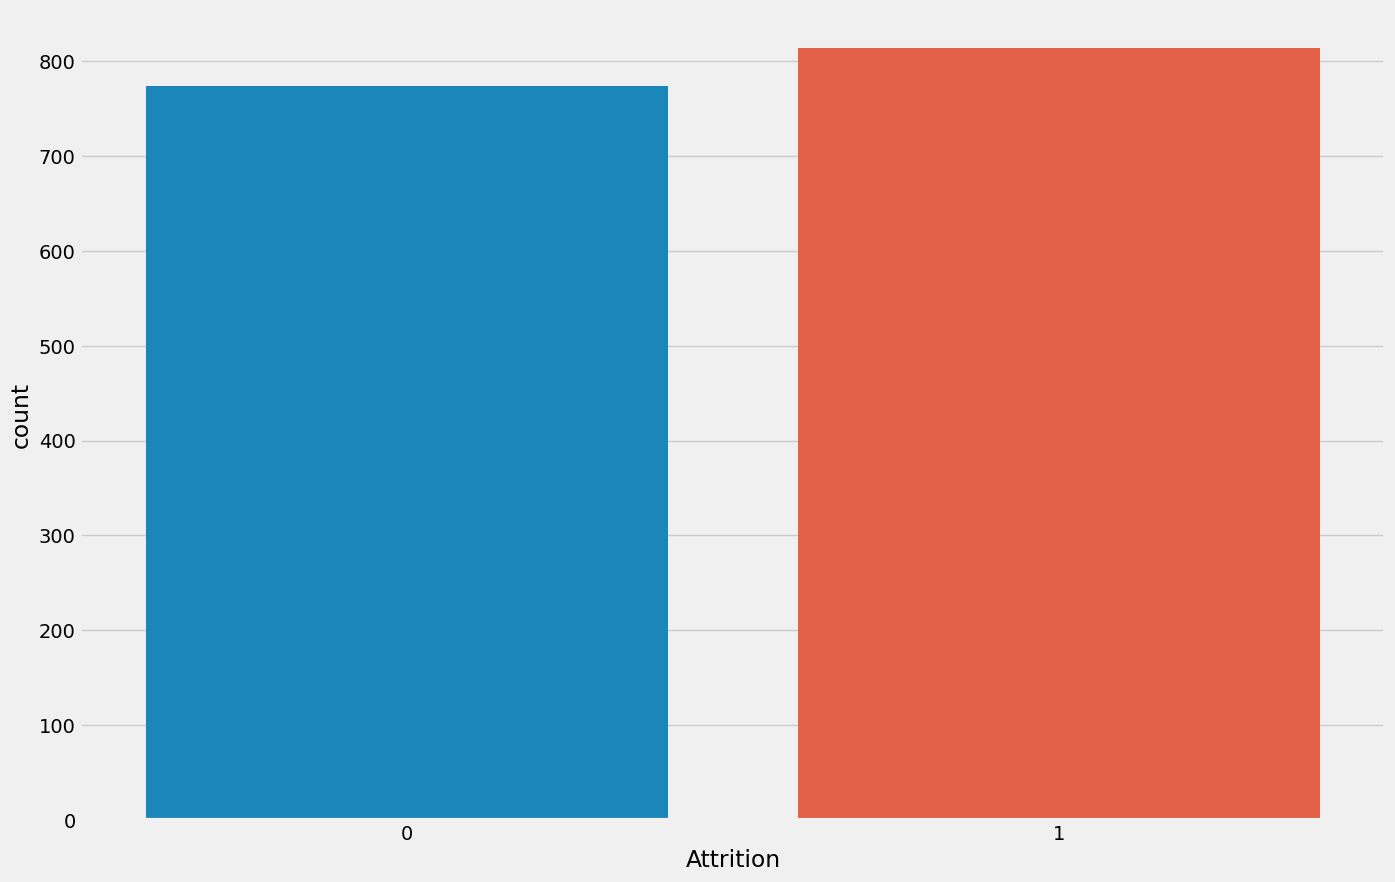

In [46]:
from imblearn.combine import SMOTEENN

##Defining the model
sn = SMOTEENN(random_state = 0)

## Training model
sn.fit(x_cf,y_cf)

## Making samples
x_cf, y_cf = sn.fit_resample(x,y)

## Class distribution
sns.countplot(y_cf)

In [47]:
from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf,y_cf, test_size = 0.2, random_state = 0)

print(x_train_cf.shape)
print(x_test_cf.shape)
print(y_train_cf.shape)
print(y_test_cf.shape)

(1270, 30)
(318, 30)
(1270,)
(318,)


In [48]:
model = DecisionTreeClassifier()
model.fit(x_train_cf, y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr = classification_report(y_pred_cf, y_test_cf)
print(cr)


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       162
           1       0.89      0.91      0.90       156

    accuracy                           0.90       318
   macro avg       0.90      0.90      0.90       318
weighted avg       0.90      0.90      0.90       318



## Dimensionality Reduction : Vairance Inflation Filtering
    
- Variance Inflation Filtering (VIF), is a statistical technique which helps us to solve the problem of multicollinearity
- Multicollinearity is a problem which occurs when there are 2 or more independent variables
- When model has multi-collinearity the model has difficulties in judging the individual effects of independent variables on dependent variables
- Methodology
    - Pick each feature and regress against all other features
    - For each regression VIR is calculated as VIR = 1/(1-R^2)
        - where R^2 is the coeffecient of determination in linear regression, value lies between 0 and 1
    - VIR is directly variable to R^2
        - VIF above 5 means high multi-collinearity

In [49]:
##statsmodels.stats.outliers_influence.variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

## VIF Dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

##Calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(x.values,i)
                            for i in range(len(x.columns))]

vif_data.style.background_gradient(cmap = "Wistia")

,feature,VIF
0,Age,35.471068
1,BusinessTravel,6.936126
2,DailyRate,5.499722
3,Department,11.165526
4,DistanceFromHome,2.711344
5,Education,9.876365
6,EducationField,3.981095
7,EnvironmentSatisfaction,7.125041
8,Gender,2.173840
9,HourlyRate,13.550311


In [50]:
## Print columns with values less than 5
vif_data.loc[vif_data['VIF']<=5]

,feature,VIF
4,DistanceFromHome,2.711344
6,EducationField,3.981095
8,Gender,2.173840
17,NumCompaniesWorked,3.043946
18,OverTime,1.538416
22,StockOptionLevel,2.335274
28,YearsSinceLastPromotion,2.578519


###### Very few values have VIF values less than 5
###### 'DistanceFromHome', 'EducationField', 'NumCompaniesWorked', 'OverTime', 'StockLevelOption', 'YearsSinceLastPromotion'

In [51]:
## Let's create Dependent and Independent Sets

x_vif = data[['DistanceFromHome', 'EducationField', 'NumCompaniesWorked', 
              'OverTime', 'StockOptionLevel', 'YearsSinceLastPromotion']]

y_vif = data['Attrition']

C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

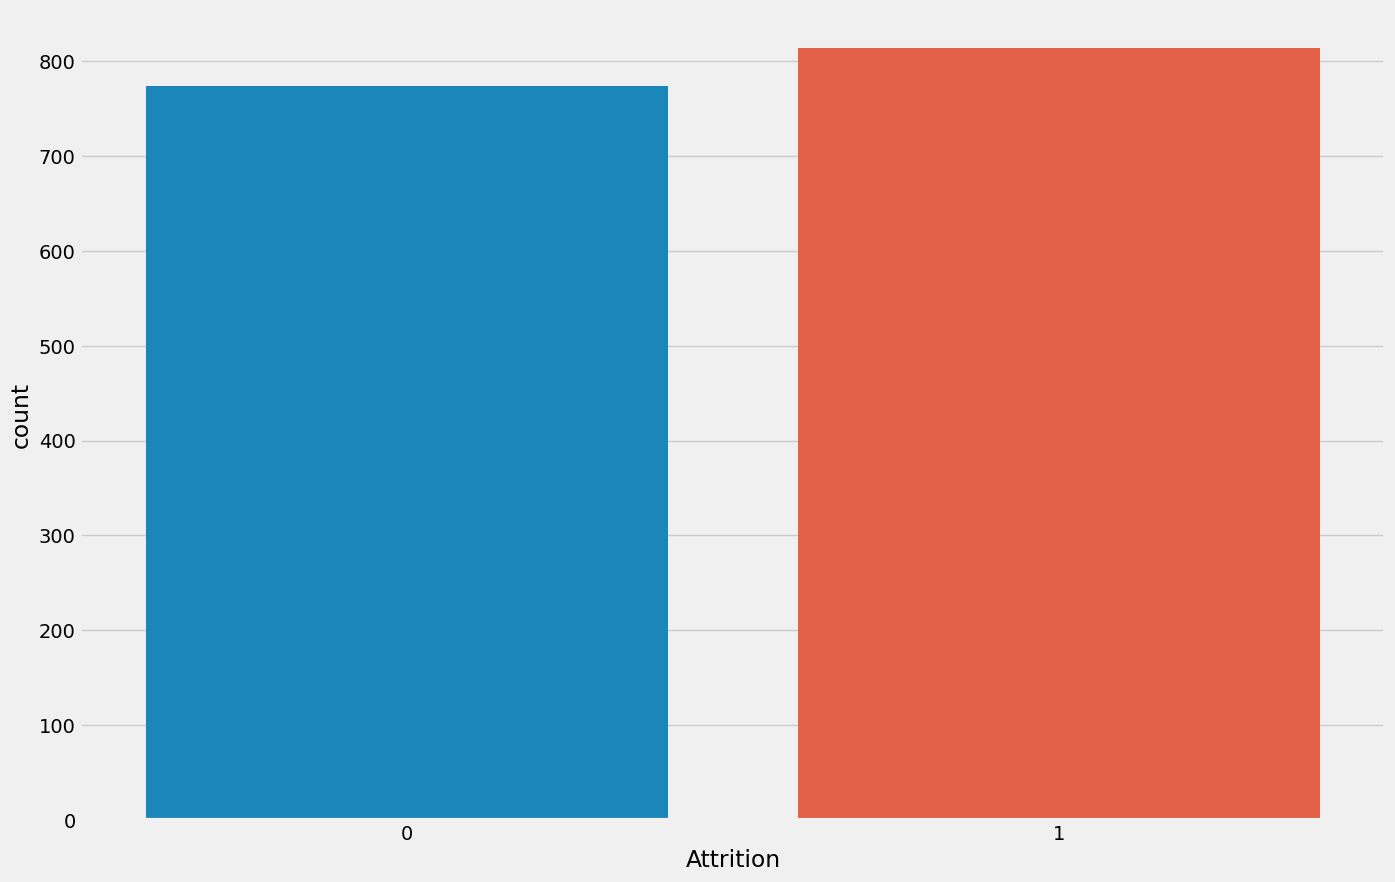

In [52]:
from imblearn.combine import SMOTEENN

##Defining the model
sn = SMOTEENN(random_state = 0)

## Training model
sn.fit(x_vif,y_vif)

## Making samples
x_vif, y_vif = sn.fit_resample(x,y)

## Class distribution
sns.countplot(y_vif)

In [53]:
#from sklearn.model_selection import train_test_split

x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif,y_vif, test_size = 0.2, random_state = 0)

print(x_train_vif.shape)
print(x_test_vif.shape)
print(y_train_vif.shape)
print(y_test_vif.shape)

(1270, 30)
(318, 30)
(1270,)
(318,)


In [54]:
model = DecisionTreeClassifier()
model.fit(x_train_vif, y_train_vif)
y_pred_vif = model.predict(x_test_vif)

cr = classification_report(y_pred_vif, y_test_vif)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       149
           1       0.92      0.86      0.89       169

    accuracy                           0.89       318
   macro avg       0.89      0.89      0.89       318
weighted avg       0.89      0.89      0.89       318



## Feature Selection

- Feature Selection is the process where we automatically or manually select those features which contribute most to our predictive models
- Irrelevant features in dataset decrease the accuracy and efficiency of predictive models
- Hence feature selection method will help us select only the useful features for predictive analysis

## Feature Selection : Recursive Feature Elimination 
    
##### RFE is a Wrapper Based Feature Selection Method
##### RFE works by searching a subset of features by starting with all features in training dataset and successfull removing features until desired number remains
- Achieved by core of the model, ranking features by importance, discarding the least important features, and re-fitting the model

- Measure of variable importance is created that ranks the predictors from most important to least

- Least importanct predictors are iteratively removed prior to rebuilding the model

- Features are scored either using algorithms like decision trees of random forest which offers importance or by using a statistical method

- Feature Selection with RFECV, recursive elimination of features from dataset to reduce complexity

In [55]:
 from sklearn.feature_selection import RFECV
    
## The 'accuracy' soring is proportional to number of correct classifications
model = DecisionTreeClassifier() ## Select Decision Tree classifier model
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy') ##Perform RFECV cross validation
rfecv = rfecv.fit(x, y)

print('Optimal number of features : ', rfecv.n_features_)
print('Best Features :', x_train.columns[rfecv.support_])

Optimal number of features :  3
Best Features : Index(['JobLevel', 'MonthlyIncome', 'MonthlyRate'], dtype='object')


In [56]:
## Let's create Dependent and Independent variables for RFECV

x_rfecv = data[['JobLevel', 'MonthlyIncome', 'MonthlyRate']]
y_rfecv = data['Attrition']

C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

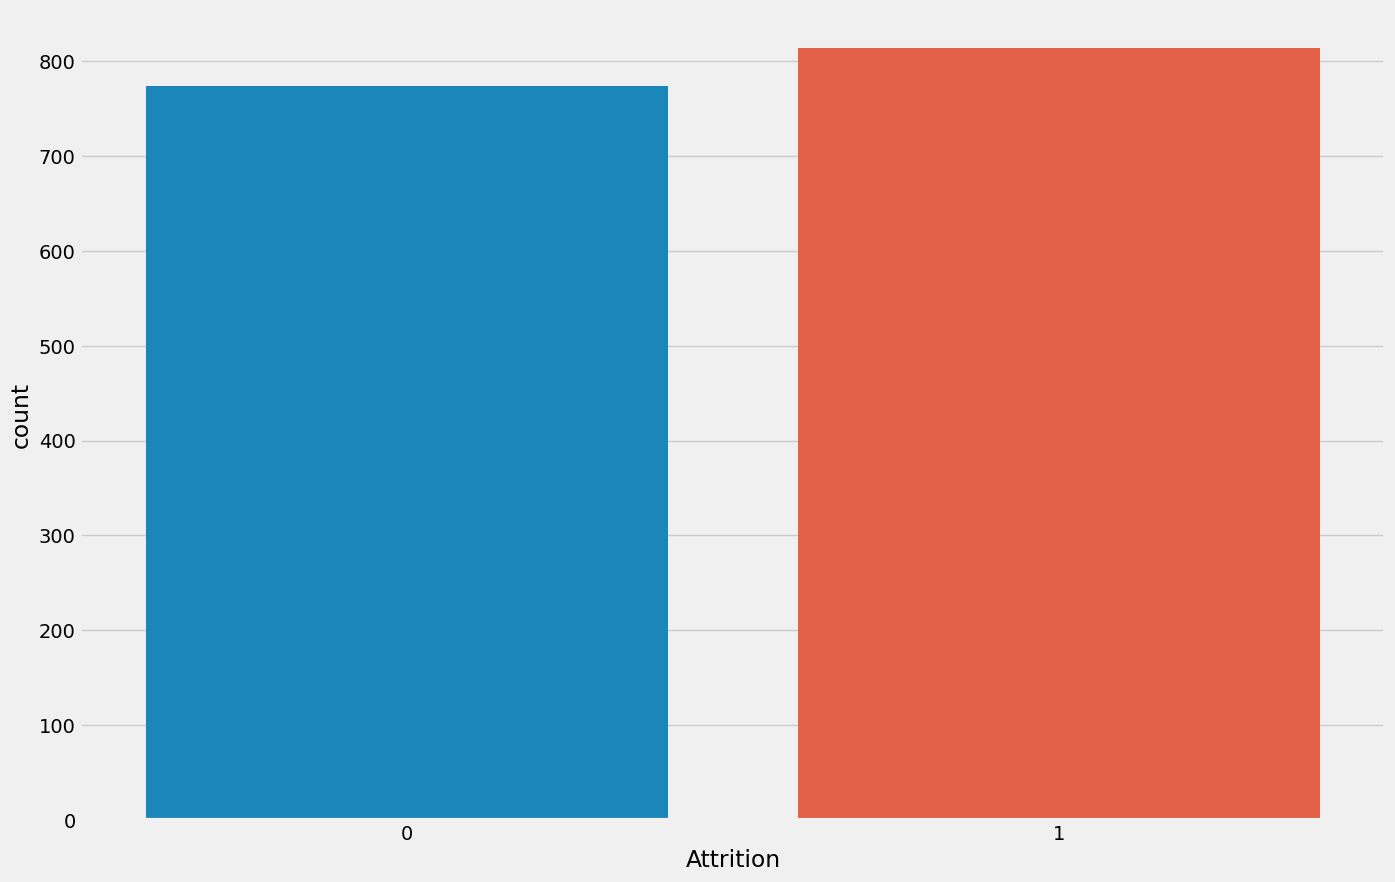

In [57]:
from imblearn.combine import SMOTEENN

##Defining the model
sn = SMOTEENN(random_state = 0)

## Training model
sn.fit(x_rfecv,y_rfecv)

## Making samples
x_rfecv, y_rfecv = sn.fit_resample(x,y)

## Class distribution
sns.countplot(y_rfecv)

In [58]:
#from sklearn.model_selection import train_test_split

x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(x_rfecv,y_rfecv, test_size = 0.2, random_state = 0)

print(x_train_rfecv.shape)
print(x_test_rfecv.shape)
print(y_train_rfecv.shape)
print(y_test_rfecv.shape)

(1270, 30)
(318, 30)
(1270,)
(318,)


In [59]:
model = DecisionTreeClassifier()
model.fit(x_train_rfecv, y_train_rfecv)
y_pred_rfecv = model.predict(x_test_rfecv)

cr = classification_report(y_pred_rfecv, y_test_rfecv)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       157
           1       0.87      0.86      0.86       161

    accuracy                           0.86       318
   macro avg       0.86      0.86      0.86       318
weighted avg       0.86      0.86      0.86       318



## Feature Selection : BorutaPy

- Methodology
    - <b>Shadow the features</b> : Features do not compete amongst themselves
    - Features compete with a randomized version of them
    - Another dataframe is created by randomly shuffling each feature
    - These permutted features are called shadow features, which are attached to original data frame to obtain a new dataframe with twice the number of original columns
    - Feature Importance for each original feature is calculated and compared with threshold
        - Threshold is defined as highest feature importance recorded among shadow features
    - When importance of a feature is higher than this threshold, then that feature is considered to be an important feature for the predictive model
    
    
##### In BorutaPy, features do not compete among themselves. Instead, they compete with a randomized version of them

In [60]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [61]:
model = RandomForestClassifier()

## define boruta selection method
boruta = BorutaPy(estimator = model, n_estimators = 'auto',
                 max_iter = 100, random_state = 0)

## Find all relevant features
boruta.fit(np.array(x), np.array(y))

## Print the results
best_features = x.columns[boruta.support_].to_list()
print('Features to keep: ', best_features)


Features to keep:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [62]:
## Let's create Dependent and Independent variables for BorutaPy

x_bor = data[ ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
               'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
               'MonthlyRate', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
               'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]
y_bor = data['Attrition']

C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

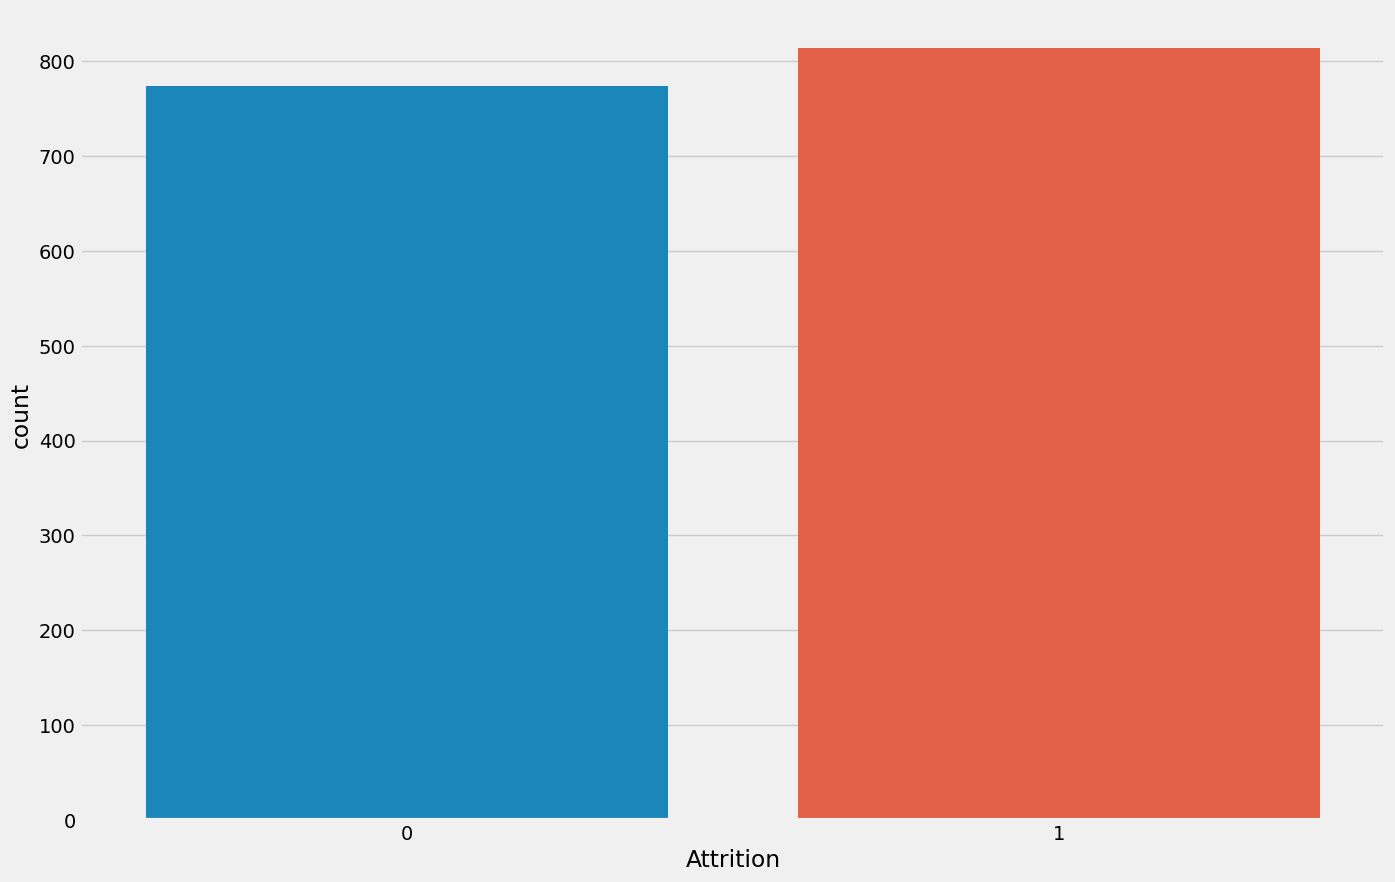

In [63]:
from imblearn.combine import SMOTEENN

##Defining the model
sn = SMOTEENN(random_state = 0)

## Training model
sn.fit(x_bor,y_bor)

## Making samples
x_bor, y_bor = sn.fit_resample(x,y)

## Class distribution
sns.countplot(y_bor)

In [64]:
#from sklearn.model_selection import train_test_split

x_train_bor, x_test_bor, y_train_bor, y_test_bor = train_test_split(x_bor,y_bor, test_size = 0.2, random_state = 0)

print(x_train_bor.shape)
print(x_test_bor.shape)
print(y_train_bor.shape)
print(y_test_bor.shape)

(1270, 30)
(318, 30)
(1270,)
(318,)


In [65]:
model = DecisionTreeClassifier()
model.fit(x_train_bor, y_train_bor)
y_pred_bor = model.predict(x_test_bor)

cr = classification_report(y_pred_bor, y_test_bor)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       153
           1       0.89      0.85      0.87       165

    accuracy                           0.87       318
   macro avg       0.87      0.87      0.87       318
weighted avg       0.87      0.87      0.87       318



## Dimensionality Reduction : Principal Component Analysis (PCA)
    
- PCA is an unsupervised, non parametric statistical technique used to reduce the dimensionality of datasets consisting of many variables correlated with each other either heavily or lightly, while retaining

- High dimensionality leads to over-fitting, which reduces the ability of machine learning models to generalize beyond examples in the training set

##### Steps for performing PCA

- Normalize the data
    - We normalize the data so that PCA works properly
- Create a co-variance matrix
    - Compute covariance matrix of whole data
- Calculate eigenvalues and eigenvectors
    - Calculate the eigen values and eigen vectors of covariance matrix
- Choosing components and forming a feature vector
    - Order the eigenvalues from largest to smallest so that it gives us the components in order of significance
        - Dataset with n variables, this means there are n eigen values and eigen vectors
        - Eigenvectors corresponding to highest eigenvalue is the principal component of dataset
        - Choose first 'p' eigen vectors and leave the rest
        
- Forming Principal components
    - This is the final step where we actually perform principal components. 
    - Take Transpose of feature vector and multiply it with the transpose of scaled version of original dataset
    
    
##### The principal components obtained are orthogonal, i.e. they are not correlated with each other
    

In [66]:
##Let's determine the value of n-components

from sklearn.decomposition import PCA

##Lets create the PCA Model
pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

##This result in variance can be explained by number of compnents 
pca.explained_variance_ratio_.cumsum()

array([0.7284166 , 0.99802283, 0.99999208, 0.99999692, 0.99999791,
       0.99999875, 0.99999927, 0.99999944, 0.99999958, 0.99999966,
       0.99999972, 0.99999978, 0.99999982, 0.99999986, 0.99999988,
       0.9999999 , 0.99999992, 0.99999993, 0.99999995, 0.99999996,
       0.99999997, 0.99999998, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

##### The first value is for first principal component, second value is for first + second principal components
##### Generally, the threshold for variance is 95%, but this can be changed depending on the scenarios 
##### See the second element, it is >99%, this implies that two variables can explain more than 99% of model variance. There fore we will perform PCA for 2 components

In [67]:
from sklearn.decomposition import PCA

## Lets create the PCA model

pca = PCA(n_components = 2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [69]:
model = DecisionTreeClassifier()
model.fit(x_train_pca, y_train)
y_pred_pca = model.predict(x_test_pca)

cr = classification_report(y_pred_pca, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       131
           1       0.91      0.87      0.89       165

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



In [70]:
## Check how these components will look

df = pd.DataFrame({'X_train_pca0':x_train_pca[:,0],
                  'X_train_pca1':x_train_pca[:,1],
                  'Attrition':y_train})

df.head()

,X_train_pca0,X_train_pca1,Attrition
1444,8699.529505,-3202.976502,1
1470,-1477.377907,-2781.027754,1
56,-8311.474393,13756.033216,0
1005,5964.857436,-2913.159831,1
467,6418.357134,5675.848243,0


C:\Users\asus\anaconda3\envs\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


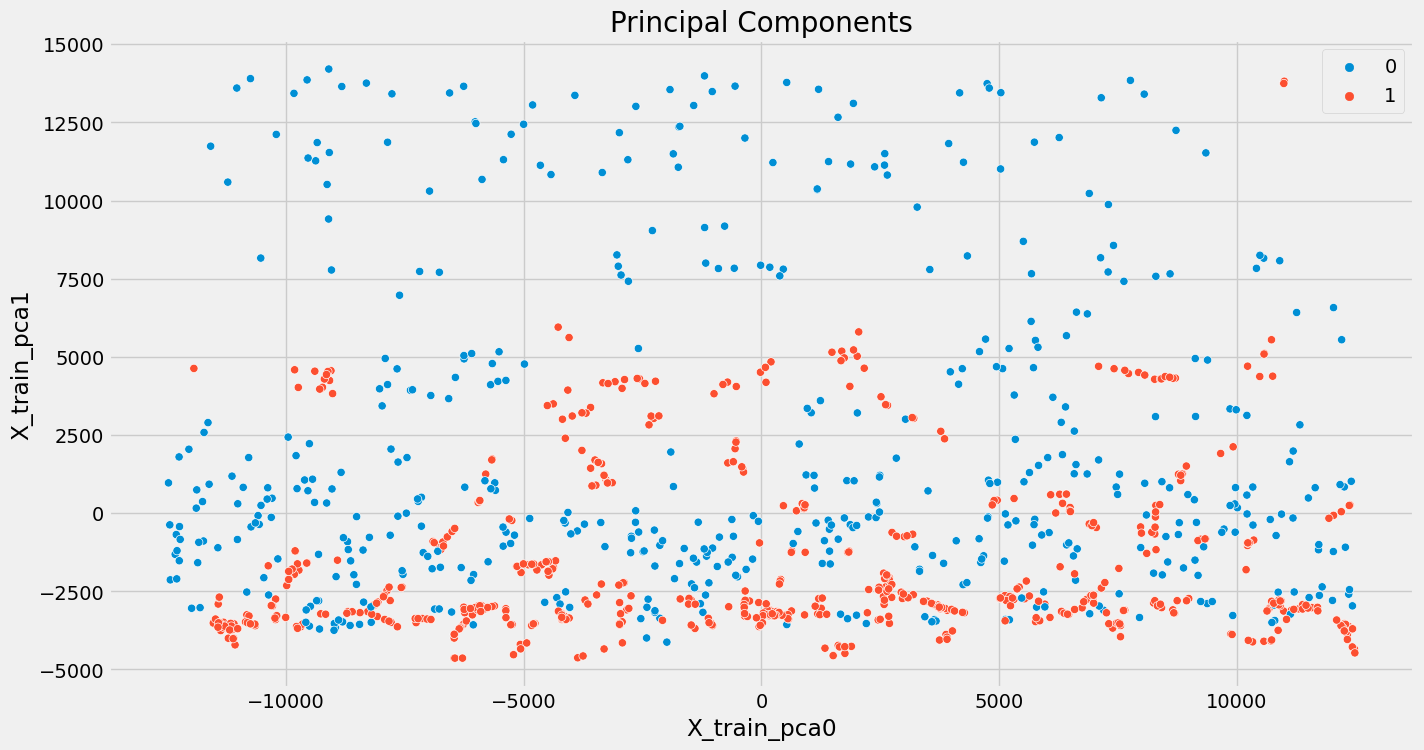

In [73]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['X_train_pca0'],df['X_train_pca1'], hue = df['Attrition'])
# plt.scatter(x[y_means == 1,0],x[y_means == 1,1], s = 100, c = 'yellow', label = 'Seg2')
# plt.scatter(x[y_means == 2,0],x[y_means == 2,1], s = 100, c = 'cyan', label = 'Seg3')
# plt.scatter(x[y_means == 3,0],x[y_means == 3,1], s = 100, c = 'magenta', label = 'Seg4')
# plt.scatter(x[y_means == 4,0],x[y_means == 4,1], s = 100, c = 'orange', label = 'Seg5')

plt.title('Principal Components', fontsize = 20)
plt.legend()
plt.show()